## Creating Target using KMeans

#### Load Libraries

In [91]:
import pandas as pd
from time import time
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Create a target variable based on results of k-means clustering , and use it as target for classification

In [92]:
#Load Target data :
surrounding_pdf = pd.read_csv('../UseCase_3_Datasets/store_surrounding_pdf_exp.csv')
store_sales = pd.read_csv('../UseCase_3_Datasets/sales_per_day_period.csv')

#print(store_sales.shape)
sales_pdf_daily_sub = store_sales[store_sales['store_code'].isin(surrounding_pdf['store_code'])]

#print(sales_pdf_daily_sub.shape)


In [93]:
sales_pdf_daily_sub.describe()

,store_code,Morning,Afternoon,Evening,Night,total_sales,sales_per_hr
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,23927.063551,0.425017,0.363575,0.209691,0.000787,17157.981308,0.934005
std,8202.167720,0.175939,0.165440,0.151145,0.007231,42598.216246,0.856830
min,282.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.006077
25%,19810.000000,0.324516,0.271525,0.105219,0.000000,1800.000000,0.311671
50%,25270.000000,0.419094,0.348522,0.191001,0.000000,5010.000000,0.702047
75%,30000.500000,0.520912,0.439825,0.283424,0.000000,11895.000000,1.228672
max,47724.000000,0.996678,0.999075,0.983607,0.110701,370560.000000,4.334496


In [94]:
sales_pdf_daily_sub.quantile([.1,.25,.5,.75,.99])

,store_code,Morning,Afternoon,Evening,Night,total_sales,sales_per_hr
0.10,12256.20,0.218839,0.195663,0.034676,0.000000,510.0,0.098592
0.25,19810.00,0.324516,0.271525,0.105219,0.000000,1800.0,0.311671
0.50,25270.00,0.419094,0.348522,0.191001,0.000000,5010.0,0.702047
0.75,30000.50,0.520912,0.439825,0.283424,0.000000,11895.0,1.228672
0.99,46333.12,0.902737,0.948252,0.720120,0.021607,247288.8,3.936286


In [95]:
#sales_pdf_daily_sub= sales_pdf_daily_sub[['total_sales','Morning','Afternoon','Evening','sales_per_hr']]
#sales_pdf_daily_sub = sales_pdf_daily_sub.loc[sales_pdf_daily_sub['total_sales'] >= 1000]
#sales_pdf_daily_sub = sales_pdf_daily_sub.loc[sales_pdf_daily_sub['total_sales'] <= 150000]
sales_pdf_daily_sub['total_sales'] = sales_pdf_daily_sub['total_sales'].apply(lambda x : np.log((x+1)))
normalizedX = sales_pdf_daily_sub[['total_sales','Morning','Afternoon','Evening','sales_per_hr']]
#normalizedX = sales_pdf_daily_sub[['Morning','Afternoon','Evening']]
normalizedX.head()


,total_sales,Morning,Afternoon,Evening,sales_per_hr
0,9.879758,0.327172,0.402437,0.270339,1.602997
1,8.268988,0.338375,0.307613,0.353755,0.583534
2,12.146646,0.406715,0.445079,0.148200,3.670953
5,10.428541,0.301677,0.296353,0.401940,2.062951
6,9.798183,0.446642,0.286651,0.266652,1.538382


In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(normalizedX)
y_kmeans = kmeans.predict(normalizedX)

In [98]:
pca = PCA(n_components=2).fit(normalizedX)
pca_nx = pca.transform(normalizedX)

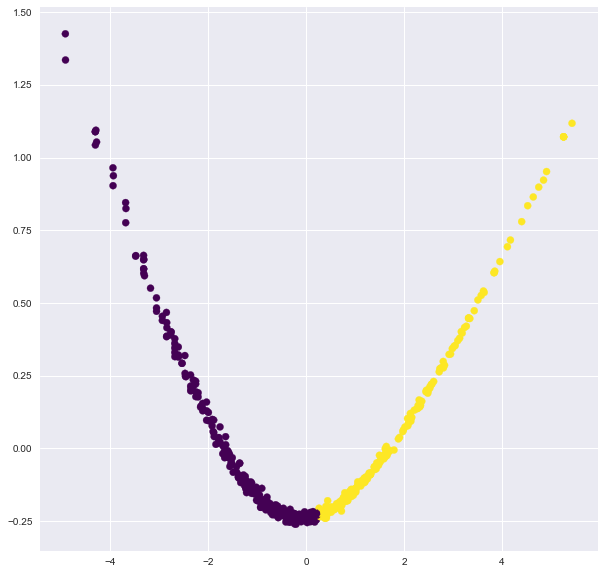

In [99]:
plt.figure(figsize=(10,10))
plt.scatter(pca_nx[:,0],pca_nx[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
#plt.scatter(centers[:,0], centers[:,1], c='black',s=200, alpha=0.5)
plt.show()

In [100]:
sales_pdf_daily_sub['y_kmeans'] = y_kmeans

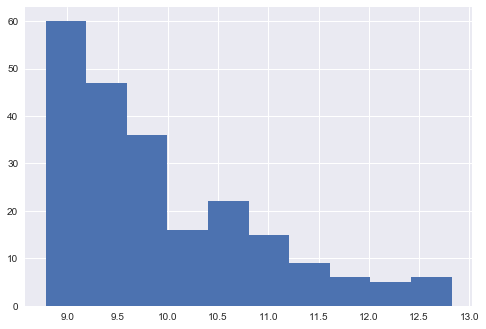

In [101]:
sales_pdf_daily_sub[sales_pdf_daily_sub['y_kmeans'] == 1].total_sales.hist()
#sales_pdf_daily_sub[sales_pdf_daily_sub['y_kmeans'] == 1].total_sales.hist()

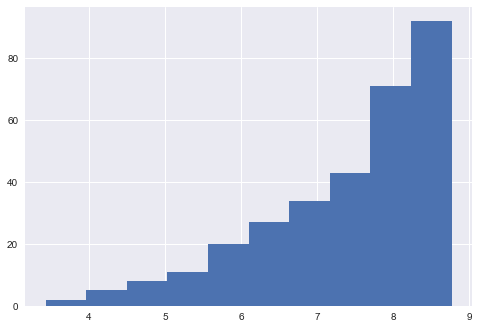

In [102]:
sales_pdf_daily_sub[sales_pdf_daily_sub['y_kmeans'] == 0].total_sales.hist()
#sales_pdf_daily_sub[sales_pdf_daily_sub['y_kmeans'] == 0].total_sales.hist()

In [103]:
sales_pdf_daily_sub['y_kmeans'].value_counts()

0    313
1    222
Name: y_kmeans, dtype: int64

In [104]:
sales_pdf_daily_sub.head()
sales_pdf_daily_sub = sales_pdf_daily_sub[['store_code','y_kmeans']]
sales_pdf_daily_sub.to_csv('../UseCase_3_Datasets/sales_y_kmeans',index=False)


In [105]:
print("Surrounding Shape",surrounding_pdf.shape)
print("Sales Shape",sales_pdf_daily_sub.shape)

Surrounding Shape (534, 183)
Sales Shape (535, 2)


In [106]:
#Join Store and Surroounding datasets
sales_surrounding_pdf = pd.merge(sales_pdf_daily_sub,surrounding_pdf,on='store_code',how='inner')
sales_surrounding_pdf = sales_surrounding_pdf.drop_duplicates()
# Dropping columns that do not provide useful information for this analysis
for i in sales_surrounding_pdf.columns:
    if sales_surrounding_pdf[i].nunique() == 1:
        sales_surrounding_pdf.drop(i, axis = 1, inplace = True)
print("Sales Surrounding Shape",sales_surrounding_pdf.shape)

Sales Surrounding Shape (533, 179)


In [107]:
import math
#One hot Encoding for city values
sales_surrounding_pdf_ohe = pd.get_dummies(sales_surrounding_pdf)
#Create Train,Test without imputation
#X = sales_surrounding_pdf.loc[:, sales_surrounding_pdf.columns != 'total_sales']
#X = sales_surrounding_pdf.loc[:, sales_surrounding_pdf.columns != 'store_code']

y = sales_surrounding_pdf_ohe['y_kmeans']
X = sales_surrounding_pdf_ohe.drop(['y_kmeans','store_code'],axis=1)
#X = sales_surrounding_pdf.drop('store_code',axis=1)

from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

print("Shape ",X.shape)
print ("Shape ",y.shape)

Shape  (533, 211)
Shape  (533,)


In [108]:
#Divide into train and test
validation_size = 0.30
seed = 33
X_train, X_test, y_train, y_test = train_test_split(normalizedX, y,test_size=validation_size,random_state=seed)

In [109]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 19
dtree_model = DecisionTreeClassifier(max_depth = 3,random_state=seed).fit(X_train, y_train)

dtree_predictions_train = dtree_model.predict(X_train)
dtree_predictions = dtree_model.predict(X_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

[[80 18]
 [33 29]]


In [110]:
import numpy as np
from sklearn.metrics import roc_auc_score
print("Train :",roc_auc_score(y_train, dtree_predictions_train))
print("Test :",roc_auc_score(y_test, dtree_predictions))

Train : 0.72518398587
Test : 0.642034233048


In [111]:
def visualize_tree(tree,feature_names,file_name):
    """Create tree png using graphviz.
    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open(file_name, 'w') as f:
        export_graphviz(tree, out_file=f,feature_names=feature_names)
    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")

visualize_tree(dtree_model,X.columns,"dt_tree_kmeans.txt")

def visualizeFeatureImportance(model,feature_names,no_of_features):
    forest = model
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    features = no_of_features
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(features):
        print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
    # Plot the feature importances of the forest
    plt.figure(figsize=(10,10))
    plt.title("Feature importances")
    plt.bar(range(features), importances[indices[:features]],color="r", yerr=std[indices[:features]], align="center")
    plt.xticks(range(features), indices[:features])
    plt.xlim([-1,features])
    plt.show()

In [112]:
from sklearn.model_selection import GridSearchCV

seed = 17
dtcf = DecisionTreeClassifier(max_depth=1,random_state=seed) 

param_grid = { 
    
    'max_depth': list(range(1,10,1)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split' : list(range(2,20,1)),
     'criterion':['entropy','gini']
}

CV_dtcf = GridSearchCV(estimator=dtcf,param_grid=param_grid,cv=10,scoring='roc_auc')
CV_dtcf.fit(X_train, y_train)

print (CV_dtcf.best_params_)
print (CV_dtcf.best_score_)

predictions_train = CV_dtcf.best_estimator_.fit(X_train, y_train).predict(X_train)
print("Train :",roc_auc_score(y_train, predictions_train))


predictions = CV_dtcf.best_estimator_.predict(X_test)
print("Test :",roc_auc_score(y_test, predictions))

visualize_tree(CV_dtcf.best_estimator_,X.columns,"CV_dtcf.best_estimator_kmeans.txt")

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 10}
0.617272495155
Train : 0.614350897851
Test : 0.61866359447


{'C': 18}
Train AUC : 0.801960784314
Test AUC : 0.656395442144
211
18
1
Features survived for RF : 40
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 390}
Train ROC-AUC : 0.76357694593
Test ROC-AUC : 0.600545658803
Feature ranking:
1. feature n_review (0.111110)
2. feature n_gym (0.053554)
3. feature n_store (0.051142)
4. feature n_real_estate_agency (0.043446)
5. feature n_restaurant (0.042777)
6. feature n_hair_care (0.039684)
7. feature avr_insurance_agency (0.039470)
8. feature avr_doctor (0.038579)
9. feature avr_cafe (0.038441)
10. feature avr_store (0.037595)
11. feature avr_atm (0.034743)
12. feature avr_hair_care (0.033945)
13. feature n_clothing_store (0.033351)
14. feature avr_dentist (0.031843)
15. feature avr_gym (0.030966)
16. feature avr_lodging (0.029201)
17. feature avr_spa (0.028083)
18. feature avr_bakery (0.025841)
19. feature avr_home_goods_store (0.021950)
20. feature n

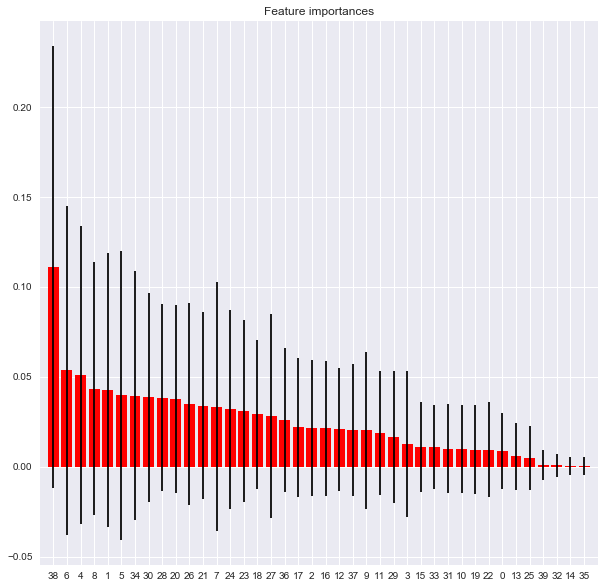

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 70}
Train ROC-AUC : 0.660145573381
Test ROC-AUC : 0.594286631359
Feature ranking:
1. feature avr_spa (0.067477)
2. feature n_store (0.055508)
3. feature n_real_estate_agency (0.049344)
4. feature avr_hair_care (0.047425)
5. feature n_clothing_store (0.044450)
6. feature n_review (0.042790)
7. feature avr_gym (0.041867)
8. feature n_gym (0.034916)
9. feature avr_dentist (0.034539)
10. feature avr_insurance_agency (0.033052)
11. feature avr_atm (0.032906)
12. feature avr_doctor (0.030703)
13. feature avr_car_repair (0.030695)
14. feature n_hair_care (0.028268)
15. feature avr_local_government_office (0.027999)
16. feature avr_cafe (0.027620)
17. feature avr_church (0.026632)
18. feature avr_post_office (0.026491)
19. feature avr_lodging (0.026215)
20. feature avr_shoe_store (0.025814)
21. feature avr_home_goods_store (0.025151)
22. feature avr_ba

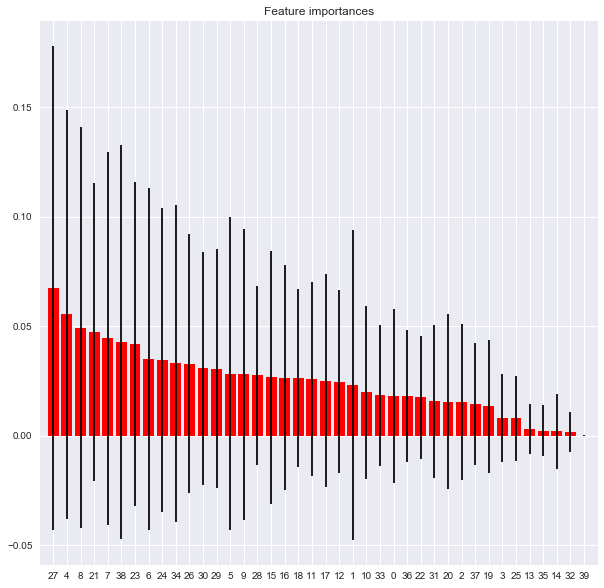

In [113]:
#Logistic Regression with L1 Penalty for variable selection and Random forest for feature imporatnce .
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

validation_size = 0.30
seed = 13
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=validation_size,random_state=seed)

from sklearn import linear_model
scaler = Normalizer().fit(X_train)
normalizedX = scaler.transform(X_train)

lr = LogisticRegression(C=1,n_jobs=10,penalty='l1') 
param_grid = { 'C': np.arange(1,100,1)}

CV_lr = RandomizedSearchCV(estimator=lr,param_distributions=param_grid, cv=10,scoring='roc_auc')
CV_lr.fit(normalizedX, y_train)
print (CV_lr.best_params_)

lr = CV_lr.best_estimator_

lr.fit(normalizedX, y_train)

predictions_train = lr.predict_proba(normalizedX)[:,1]
print("Train AUC :",roc_auc_score(y_train,predictions_train))

normalizedX_test = scaler.transform(X_test)
predictions = lr.predict_proba(normalizedX_test)[:,1]
print("Test AUC :",roc_auc_score(y_test,predictions))

print (len(X.columns))
print (lr.C)
print (len(lr.coef_))

survival_list = []

for i in range(0,len(X.columns)):
    if lr.coef_[:,i]!=0:
        survival_list.append(X.columns[i])
print ("Features survived for RF :",len(survival_list))

#Subselect the data using the variables survived from Lasso
X_sub = X[X.columns.intersection(survival_list)]
y_sub = y

#Divide 
validation_size = 0.30
seed = 13
X_train, X_test, y_train, y_test = train_test_split(X_sub,y_sub,test_size=validation_size,random_state=seed)

rfc = RandomForestClassifier(n_jobs=-1) 

# n_estimator = list(range(10,500,10))
# print(n_estimator)
param_grid = { 
    'n_estimators': list(range(10,500,10)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(3,9,1)),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

CV_rfc = RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,cv= 5,scoring='roc_auc',random_state=seed)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)


seed = 13
rf_clf = CV_rfc.best_estimator_
rf_clf.fit(X_train,y_train)
predictions_train = rf_clf.predict(X_train)
print("Train ROC-AUC :",roc_auc_score(y_train, predictions_train))
# estimate accuracy on validation dataset
predictions = rf_clf.predict(X_test)
print("Test ROC-AUC :",roc_auc_score(y_test, predictions))
visualizeFeatureImportance(rf_clf,X_train.columns,len(survival_list))

#Randomised search for ET Classifier

et_clf = ExtraTreesClassifier(n_jobs=-1) 

# n_estimator = list(range(10,500,10))
# print(n_estimator)
param_grid = { 
    'n_estimators': list(range(10,100,10)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(3,9,1)),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

CV_et_clf = RandomizedSearchCV(estimator=et_clf,param_distributions=param_grid,cv= 5,scoring='roc_auc',
                               random_state=seed)
CV_et_clf.fit(X_train, y_train)
print (CV_et_clf.best_params_)

et_clf = CV_et_clf.best_estimator_
et_clf.fit(X_train,y_train)
predictions_train = et_clf.predict(X_train)
print("Train ROC-AUC :",roc_auc_score(y_train, predictions_train))
# estimate accuracy on validation dataset
predictions = et_clf.predict(X_test)
print("Test ROC-AUC :",roc_auc_score(y_test, predictions))
visualizeFeatureImportance(et_clf,X_train.columns,len(survival_list))

{'alpha': 0.12}
Train AUC : 0.68743315508
Test ROC_AUC : 0.639383726529
0.12
Features survied : 8
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 120}
Train ROC-AUC : 0.769979203803
Test ROC-AUC : 0.605601027122
Feature ranking:
1. feature n_review (0.282365)
2. feature n_doctor (0.158877)
3. feature n_pharmacy (0.108254)
4. feature n_store (0.103593)
5. feature n_real_estate_agency (0.097438)
6. feature n_lodging (0.087261)
7. feature n_clothing_store (0.081699)
8. feature n_restaurant (0.080512)


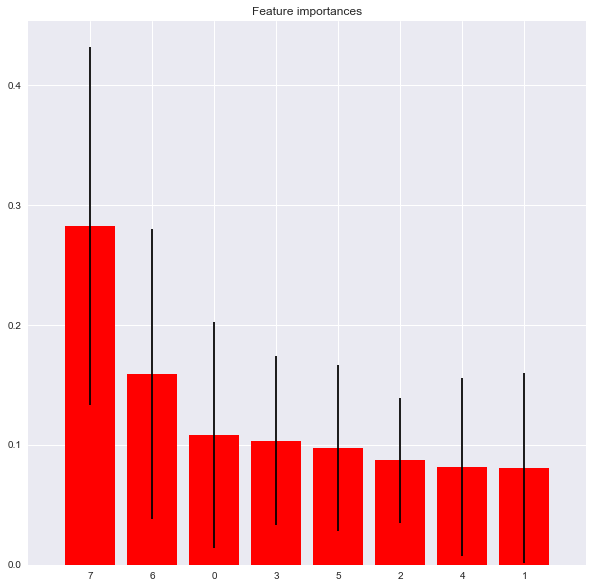

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 360}
Train ROC-AUC : 0.622638146168
Test ROC-AUC : 0.564435885091
Feature ranking:
1. feature n_pharmacy (0.187296)
2. feature n_store (0.166849)
3. feature n_restaurant (0.141285)
4. feature n_doctor (0.128731)
5. feature n_review (0.112635)
6. feature n_real_estate_agency (0.102400)
7. feature n_clothing_store (0.099287)
8. feature n_lodging (0.050407)


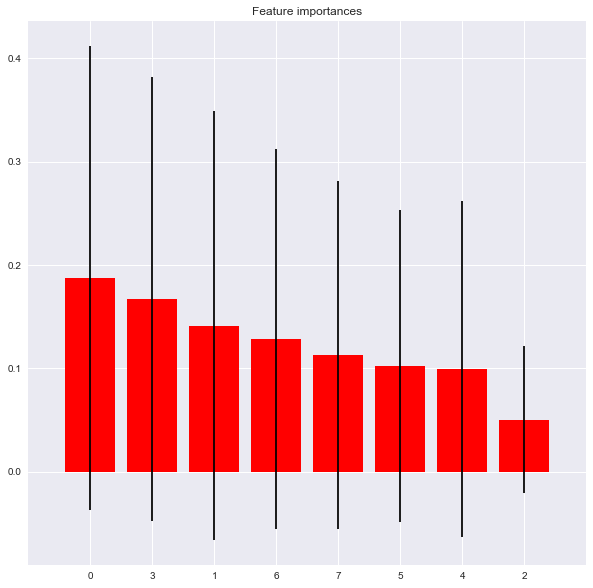

In [114]:
#Lasso Regression for variable selection and Random forest for feature imporatnce .

validation_size = 0.30
seed = 13

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=validation_size,random_state=seed)

from sklearn import linear_model
ls_clf = linear_model.Lasso(alpha=0.01,selection='random')
param_grid = { 'alpha': np.arange(0.01,1,0.01)}


CV_lr = RandomizedSearchCV(estimator=ls_clf,param_distributions=param_grid, cv=10,scoring='roc_auc')
CV_lr.fit(X_train, y_train)
print (CV_lr.best_params_)


CV_lr.best_estimator_.fit(X_train,y_train)
predictions_train = CV_lr.best_estimator_.predict(X_train)
print("Train AUC :",roc_auc_score(y_train,predictions_train))
predictions = CV_lr.best_estimator_.predict(X_test)
print("Test ROC_AUC :",roc_auc_score(y_test, predictions))
# print (len(CV_lr.best_estimator_.coef_))
# print (len(X.columns))
print (CV_lr.best_estimator_.alpha)

lasso_survival_list = []
for i in range(0,len(X.columns)):
    if CV_lr.best_estimator_.coef_[i]!=0:
        lasso_survival_list.append(X.columns[i])
print ("Features survied :",len(lasso_survival_list))

#Subselect the data using the variables survived from Lasso
X_sub = X[X.columns.intersection(lasso_survival_list)]
y_sub = y

#Divide 
validation_size = 0.30
seed = 13
X_train, X_test, y_train, y_test = train_test_split(X_sub,y_sub,test_size=validation_size,random_state=seed)


from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(n_jobs=-1) 

# n_estimator = list(range(10,500,10))
# print(n_estimator)
param_grid = { 
    'n_estimators': list(range(10,500,10)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(3,9,1)),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

CV_rfc = RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,cv= 5,scoring='roc_auc',random_state=seed)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

seed = 13
rf_clf = CV_rfc.best_estimator_

rf_clf.fit(X_train,y_train)
predictions_train = rf_clf.predict(X_train)
print("Train ROC-AUC :",roc_auc_score(y_train, predictions_train))
# estimate accuracy on validation dataset
predictions = rf_clf.predict(X_test)
print("Test ROC-AUC :",roc_auc_score(y_test, predictions))
visualizeFeatureImportance(rf_clf,X_train.columns,len(lasso_survival_list))

et_clf = ExtraTreesClassifier(n_jobs=-1) 

# n_estimator = list(range(10,500,10))
# print(n_estimator)
param_grid = { 
    'n_estimators': list(range(10,500,10)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(3,9,1)),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

CV_et_clf = RandomizedSearchCV(estimator=et_clf,param_distributions=param_grid,cv= 5,scoring='roc_auc',
                               random_state=seed)
CV_et_clf.fit(X_train, y_train)
print (CV_et_clf.best_params_)


seed = 29
et_clf = CV_et_clf.best_estimator_
et_clf.fit(X_train,y_train)
predictions_train = et_clf.predict(X_train)
print("Train ROC-AUC :",roc_auc_score(y_train, predictions_train))
# estimate accuracy on validation dataset
predictions = et_clf.predict(X_test)
print("Test ROC-AUC :",roc_auc_score(y_test, predictions))

visualizeFeatureImportance(et_clf,X_train.columns,len(lasso_survival_list))

In [115]:
lasso_survival_list

['n_pharmacy',
 'n_restaurant',
 'n_lodging',
 'n_store',
 'n_clothing_store',
 'n_real_estate_agency',
 'n_doctor',
 'n_review']